# Project on classification Model 
## Problem Statement
### Problem 1:
#### Prediction task is to determine whether a person makes over 50K a year.

### Problem 2:
#### Which factors are important

### Problem 3:
#### Which algorithms are best for this dataset

# Data Description:

## Source
* This data was extracted from the census bureau database found at
* 
http://www.census.gov/ftp/pub/DES/www/welcome.html

* Donor: Ronny Kohavi and Barry Becker,
*        Data Mining and Visualization
*        Silicon Graphics.
*        e-mail: ronnyk@sgi.com for questions.

## Distribution of Train and Test
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
* 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)

* Duplicate or conflicting instances : 6

## Class Probabilities

* Class probabilities for adult.all file
* Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
* Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
* Extraction was done by Barry Becker from the 1994 Census database.  A set of
*   reasonably clean records was extracted using the following conditions:
*   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))


## Note: Prediction task is to determine whether a person makes over 50K a year.

## Conversion of original data as follows:
* 1. Discretized agrossincome into two ranges with threshold 50,000.
* 2. Convert U.S. to US to avoid periods.
* 3. Convert Unknown to "?"
* 4. Run MLC++ GenCVFiles to generate data,test.


## Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls.
*  These are:
*          1.  A single cell estimate of the population 16+ for each state.
*          2.  Controls for Hispanic Origin by age and sex.
*          3.  Controls by Race, age and sex.


> * We use all three sets of controls in our weighting program and "rake" through
> * them 6 times so that by the end we come back to all the controls we used.

> * The term estimate refers to population totals derived from CPS by creating
> * "weighted tallies" of any specified socio-economic characteristics of the
> * population.

> * People with similar demographic characteristics should have
* similar weights.  There is one important caveat to remember
* about this statement.  That is that since the CPS sample is
* actually a collection of 51 state samples, each with its own
* probability of selection, the statement only applies within
* state.


## Attribute Information:
Listing of attributes:
#### >50K, <=50K.
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-
specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.

## 1. Load important libraries and data into our project

In [50]:
#importing the important libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
dataset = ['data/adult_train.csv', 
           'data/adult_test.csv']
dataset[0]

'data/adult_train.csv'

In [28]:
# loading training set of data
train_set = pd.read_csv(dataset[0],header=None)

# loading test set of data
test_set = pd.read_csv(dataset[1], header = None)

# name of the columns
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 
              'capital_gain', 'capital_loss', 'hours_per_week',
              'native_country', 'wage_class']

#setting the columns name of the dataframe
train_set.columns = col_labels
test_set.columns = col_labels

In [29]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## 2. Exploring datasets and Data cleaning

In [31]:
# replacing ' ?' with np.nan
train_set.replace(' ?',np.nan, inplace=True)
# top 5 rows of training set data frame
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
# replacing ' ?' with np.nan
test_set.replace(' ?',np.nan, inplace=True)
# top 5 rows of test set data frame
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [33]:
# train set data exploration

print("shape of train set is ",train_set.shape)
print("-"*100)

print("Info. about the train set is \n ")
print(train_set.info())
print("-"*100)

print("checking for the null values in %age \n ")
print((train_set.isnull().sum()/32561)*100)

shape of train set is  (32561, 15)
----------------------------------------------------------------------------------------------------
Info. about the train set is 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
--------------------------------------------------------------------------

In [34]:
# test set data exploration

print("shape of test set is ",test_set.shape)
print("-"*100)

print("Info. about the test set is \n ")
print(test_set.info())
print("-"*100)

print("checking for the null values \n ")
print((test_set.isnull().sum()/16281)*100)

shape of test set is  (16281, 15)
----------------------------------------------------------------------------------------------------
Info. about the test set is 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         15318 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        15315 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16007 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB
None
----------------------------------------------------------------------------

In [35]:
# drop np.nan values of train_set
train_set.dropna(inplace=True)

print("checking for the null values \n ")
print((train_set.isnull().sum()/32561)*100)

checking for the null values 
 
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
wage_class        0.0
dtype: float64


In [36]:
# drop np.nan values of test_set
test_set.dropna(inplace=True)

print("checking for the null values \n ")
print((test_set.isnull().sum()/32561)*100)

checking for the null values 
 
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
wage_class        0.0
dtype: float64


### 2.1. Encoding the categorical variables( nominal and ordinal variables) 

In [37]:
# converting catergorical variables in train_set to numeric form

#creating label encoder class and making object le
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# converting catergorical to numeric
train_set['workclass']=le.fit_transform(train_set.workclass.values)
train_set['education']=le.fit_transform(train_set.education.values)
train_set['marital_status']=le.fit_transform(train_set.marital_status.values)
train_set['occupation']=le.fit_transform(train_set.occupation.values)
train_set['relationship']=le.fit_transform(train_set.relationship.values)
train_set['race']=le.fit_transform(train_set.race.values)
train_set['sex']=le.fit_transform(train_set.sex.values)
train_set['native_country']=le.fit_transform(train_set.native_country.values)
train_set['wage_class']=train_set.wage_class.map({' <=50K':0, ' >50K':1})

In [38]:
# converting catergorical variables in test_set to numeric form

# creating label encoder class and making object le
le = preprocessing.LabelEncoder()

# converting catergorical to numeric
test_set['workclass']=le.fit_transform(test_set.workclass.values)
test_set['education']=le.fit_transform(test_set.education.values)
test_set['marital_status']=le.fit_transform(test_set.marital_status.values)
test_set['occupation']=le.fit_transform(test_set.occupation.values)
test_set['relationship']=le.fit_transform(test_set.relationship.values)
test_set['race']=le.fit_transform(test_set.race.values)
test_set['sex']=le.fit_transform(test_set.sex.values)
test_set['native_country']=le.fit_transform(test_set.native_country.values)
test_set['wage_class']=test_set.wage_class.map({' <=50K.':0, ' >50K.':1})

In [39]:
# printing top 5 rows of train_set
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [40]:
# printing top 5 rows of test_set
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


### 2.2. creating the dummy from categorical variables

In [41]:
# creating dummy variables from encoded value in train_set
print(train_set.columns)

workclass_dummies=pd.get_dummies(train_set.workclass,prefix='wclass').iloc[:,1:]
train_set= pd.concat([train_set,workclass_dummies],axis=1)
train_set.drop('workclass',axis=1,inplace=True)

education_dummies=pd.get_dummies(train_set.education,prefix='educ').iloc[:,1:]
train_set= pd.concat([train_set,education_dummies],axis=1)
train_set.drop('education',axis=1,inplace=True)

marital_status_dummies=pd.get_dummies(train_set.marital_status,prefix='mstat').iloc[:,1:]
train_set= pd.concat([train_set,marital_status_dummies],axis=1)
train_set.drop('marital_status',axis=1,inplace=True)

occupation_dummies=pd.get_dummies(train_set.occupation,prefix='occup').iloc[:,1:]
train_set= pd.concat([train_set,occupation_dummies],axis=1)
train_set.drop('occupation',axis=1,inplace=True)

relationship_dummies=pd.get_dummies(train_set.relationship,prefix='rltnshp').iloc[:,1:]
train_set= pd.concat([train_set,relationship_dummies],axis=1)
train_set.drop('relationship',axis=1,inplace=True)

race_dummies=pd.get_dummies(train_set.race,prefix='race').iloc[:,1:]
train_set= pd.concat([train_set,race_dummies],axis=1)
train_set.drop('race',axis=1,inplace=True)

native_country_dummies=pd.get_dummies(train_set.native_country,prefix='nat_cntry').iloc[:,1:]
train_set= pd.concat([train_set,native_country_dummies],axis=1)
train_set.drop('native_country',axis=1,inplace=True)


print(train_set.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')
Index(['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'wage_class', 'wclass_1', 'wclass_2', 'wclass_3',
       'wclass_4', 'wclass_5', 'wclass_6', 'educ_1', 'educ_2', 'educ_3',
       'educ_4', 'educ_5', 'educ_6', 'educ_7', 'educ_8', 'educ_9', 'educ_10',
       'educ_11', 'educ_12', 'educ_13', 'educ_14', 'educ_15', 'mstat_1',
       'mstat_2', 'mstat_3', 'mstat_4', 'mstat_5', 'mstat_6', 'occup_1',
       'occup_2', 'occup_3', 'occup_4', 'occup_5', 'occup_6', 'occup_7',
       'occup_8', 'occup_9', 'occup_10', 'occup_11', 'occup_12', 'occup_13',
       'rltnshp_1', 'rltnshp_2', 'rltnshp_3', 'rltnshp_4', 'rltnshp_5',
       'race_1', 'race_2', 'race_3', 'race_4', 'nat_cntry_1', 'nat_cnt

In [43]:
# printing top 5 rows of the train_set with ctergorical variable replaced with dummy variables
train_set.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,wage_class,wclass_1,wclass_2,...,nat_cntry_31,nat_cntry_32,nat_cntry_33,nat_cntry_34,nat_cntry_35,nat_cntry_36,nat_cntry_37,nat_cntry_38,nat_cntry_39,nat_cntry_40
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# creating dummy variables from encoded value in test_set
print(test_set.columns)

workclass_dummies=pd.get_dummies(test_set.workclass,prefix='wclass').iloc[:,1:]
test_set= pd.concat([test_set,workclass_dummies],axis=1)
test_set.drop('workclass',axis=1,inplace=True)

education_dummies=pd.get_dummies(test_set.education,prefix='educ').iloc[:,1:]
test_set= pd.concat([test_set,education_dummies],axis=1)
test_set.drop('education',axis=1,inplace=True)

marital_status_dummies=pd.get_dummies(test_set.marital_status,prefix='mstat').iloc[:,1:]
test_set= pd.concat([test_set,marital_status_dummies],axis=1)
test_set.drop('marital_status',axis=1,inplace=True)

occupation_dummies=pd.get_dummies(test_set.occupation,prefix='occup').iloc[:,1:]
test_set= pd.concat([test_set,occupation_dummies],axis=1)
test_set.drop('occupation',axis=1,inplace=True)

relationship_dummies=pd.get_dummies(test_set.relationship,prefix='rltnshp').iloc[:,1:]
test_set= pd.concat([test_set,relationship_dummies],axis=1)
test_set.drop('relationship',axis=1,inplace=True)

race_dummies=pd.get_dummies(test_set.race,prefix='race').iloc[:,1:]
test_set= pd.concat([test_set,race_dummies],axis=1)
test_set.drop('race',axis=1,inplace=True)

native_country_dummies=pd.get_dummies(test_set.native_country,prefix='nat_cntry').iloc[:,1:]
test_set= pd.concat([test_set,native_country_dummies],axis=1)
test_set.drop('native_country',axis=1,inplace=True)

test_set['nat_cntry_40']=np.zeros(len(test_set)).astype(int)
print(test_set.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')
Index(['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'wage_class', 'wclass_1', 'wclass_2', 'wclass_3',
       'wclass_4', 'wclass_5', 'wclass_6', 'educ_1', 'educ_2', 'educ_3',
       'educ_4', 'educ_5', 'educ_6', 'educ_7', 'educ_8', 'educ_9', 'educ_10',
       'educ_11', 'educ_12', 'educ_13', 'educ_14', 'educ_15', 'mstat_1',
       'mstat_2', 'mstat_3', 'mstat_4', 'mstat_5', 'mstat_6', 'occup_1',
       'occup_2', 'occup_3', 'occup_4', 'occup_5', 'occup_6', 'occup_7',
       'occup_8', 'occup_9', 'occup_10', 'occup_11', 'occup_12', 'occup_13',
       'rltnshp_1', 'rltnshp_2', 'rltnshp_3', 'rltnshp_4', 'rltnshp_5',
       'race_1', 'race_2', 'race_3', 'race_4', 'nat_cntry_1', 'nat_cnt

In [45]:
# printing top 5 rows of the test_set with ctergorical variable replaced with dummy variables
test_set.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,wage_class,wclass_1,wclass_2,...,nat_cntry_31,nat_cntry_32,nat_cntry_33,nat_cntry_34,nat_cntry_35,nat_cntry_36,nat_cntry_37,nat_cntry_38,nat_cntry_39,nat_cntry_40
0,25,226802,7,1,0,0,40,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,1,0,0,50,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,1,0,0,40,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,1,7688,0,40,1,0,1,...,0,0,0,0,0,0,1,0,0,0
5,34,198693,6,1,0,0,30,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [46]:
# dividing train set into independent and dependent variables
x_train= pd.concat([train_set.iloc[:,:7],train_set.iloc[:,8:]],axis=1)
y_train= train_set['wage_class']
x_train.head()
#y_train.head(-1)

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,wclass_1,wclass_2,wclass_3,...,nat_cntry_31,nat_cntry_32,nat_cntry_33,nat_cntry_34,nat_cntry_35,nat_cntry_36,nat_cntry_37,nat_cntry_38,nat_cntry_39,nat_cntry_40
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# dividing test set into independent and dependent variables
x_test= pd.concat([test_set.iloc[:,:7],test_set.iloc[:,8:]],axis=1)
y_test= test_set['wage_class']
x_test.head()
#y_test.head(-1)

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,wclass_1,wclass_2,wclass_3,...,nat_cntry_31,nat_cntry_32,nat_cntry_33,nat_cntry_34,nat_cntry_35,nat_cntry_36,nat_cntry_37,nat_cntry_38,nat_cntry_39,nat_cntry_40
0,25,226802,7,1,0,0,40,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,1,0,0,50,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,1,7688,0,40,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,34,198693,6,1,0,0,30,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
# checking shape of train and test set
print('x train set shape',x_train.shape)
print('y train set shape',y_train.shape)
print('x test set shape',x_test.shape)
print('y test set shape',y_test.shape)

x train set shape (30162, 96)
y train set shape (30162,)
x test set shape (15060, 96)
y test set shape (15060,)


## 3. Model making and parameter tuning (Xgboost Algorithm)

In [51]:
import warnings
warnings.filterwarnings('ignore')

# putting the data in dmatrix
xg_train = xgb.DMatrix(x_train, label=y_train);
xg_test = xgb.DMatrix(x_test, label=y_test);

print("Train dataset contains {0} rows and {1} columns".format(xg_train.num_row(), xg_train.num_col()))
print("Test dataset contains {0} rows and {1} columns".format(xg_test.num_row(), xg_test.num_col()))

#setting the parameters for the model
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.1,
    'silent': 1.0,
    'n_estimators':50
}

# training the model
bst = XGBClassifier(**params).fit(x_train, y_train)

# predicting the model on test set
y_predict = bst.predict(x_test)

# calculating accuracy and confusion matrix
accuracy= accuracy_score(y_test,y_predict)
confusion_matrix= confusion_matrix(y_test,y_predict)

print("-"*100)
print('Accuracy: ',accuracy*100,'%')
print('Confusion Matrix:\n ', confusion_matrix)

Train dataset contains 30162 rows and 96 columns
Test dataset contains 15060 rows and 96 columns
----------------------------------------------------------------------------------------------------
Accuracy:  86.45418326693228 %
Confusion Matrix:
  [[10797   563]
 [ 1477  2223]]


## Parameter tuning
### Step 1: Fix learning rate and number of estimators for tuning tree-based parameters 

In [62]:
n_folds = 5
early_stopping = 50

#setting the params to calculate cross validation
params = {
    'eta': 0.1,
    'max_depth': 5,  
    'objective': 'binary:logistic', 
    'seed': 99, 
    'silent': 1, 
    'eval_metric':'error', 
    'nthread':4

}
# calculating cross validation using xgboost model
cvresult = xgb.cv(params, xg_train, 5000, nfold=n_folds,early_stopping_rounds=early_stopping)

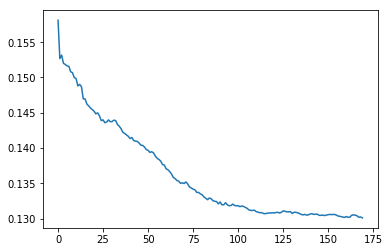

165    0.130495
166    0.130396
167    0.130197
168    0.130230
169    0.130098
Name: test-error-mean, dtype: float64

In [66]:
# printing the last 5 rows
df_error=cvresult['test-error-mean']
plt.plot(df_error)
plt.show()
df_error.tail()

In [67]:
# training the model and predicting the value with the updated value of no of estimators =170

from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost.sklearn import XGBClassifier

# setting the params to train the model
params1 = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.1,
    'silent': 1.0,
    'n_estimators':cvresult.shape[0]
}

#training the model
bst = XGBClassifier(**params1).fit(x_train, y_train)

# predicting the value on the test set
y_predict = bst.predict(x_test)

# calculating the accuracy on the test data
accuracy= accuracy_score(y_test,y_predict)
confusion_matrix= confusion_matrix(y_test,y_predict)

print('Accuracy: ',accuracy*100,'%')
print('Confusion Matrix:\n ', confusion_matrix)

Accuracy:  87.11819389110225 %
Confusion Matrix:
  [[10734   626]
 [ 1314  2386]]


### Step 2: Tune max_depth 

In [72]:
 # calcuating the optimal value of max_depth parameter between [3,10)

for md in range(3,10,1):
    cvresult = xgb.cv({'eta': 0.1,'max_depth': md,'objective': 'binary:logistic','seed': 99,'silent': 1,'eval_metric':'error', 'nthread':4},
                    xg_train, 170, nfold=n_folds,early_stopping_rounds=early_stopping)
    print("max depth= ",md," test error= ",cvresult.iloc[-1:,:].values[0][2])
   
       
        

max depth=  3  test error=  0.1341754
max depth=  4  test error=  0.1320534
max depth=  5  test error=  0.13009759999999998
max depth=  6  test error=  0.130661
max depth=  7  test error=  0.1311584
max depth=  8  test error=  0.1307936
max depth=  9  test error=  0.13185460000000002


In [105]:
# finally building the model on the optimal value of all the parameter max_depth=5, no_estimators=170, learning_rate= 0.1

from sklearn.metrics import confusion_matrix

# setting the optimal value of param
params2 = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.1,
    'silent': 1.0,
    'n_estimators':170
}

# training the model on the training data
classifier2 = XGBClassifier(**params2).fit(x_train, y_train)

# predicting the value on the test set
y_predict = classifier2.predict(x_test)

# calculating the accuarcy score and confusion matrix
acc= accuracy_score(y_test,y_predict)
conf_mat= confusion_matrix(y_test,y_predict)

print('Error: ', (1-acc))
print('Accuracy: ',acc*100,'%')
print('Confusion Matrix:\n ',conf_mat)


Error:  0.12881806108897742
Accuracy:  87.11819389110225 %
Confusion Matrix:
  [[10734   626]
 [ 1314  2386]]


we see that after tuning the parameter for max_depth=5, no_estimators=170, learning_rate= 0.1 we got a 

Accuracy:  87.11819389110225 %

## Which factors are important ?

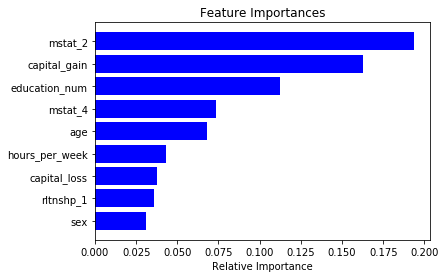

In [93]:
# Using Random forest algorithms to find the factors importance
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000,random_state=1, max_depth=10)
model.fit(x_train,y_train)

features = x_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Important factors based on accuracy 

#### ['mstat_2', 'capital_gain', 'education_num', 'mstat_4', 'age', 'hours_per_week', 'capital_loss', 'rltnshp_1', 'sex']

In [113]:
# saving 9 important columns in a list
imp_col_names=[]
features = x_train.columns
for i in indices:
    imp_col_names.append(features[i])
imp_col_names

['sex',
 'rltnshp_1',
 'capital_loss',
 'hours_per_week',
 'age',
 'mstat_4',
 'education_num',
 'capital_gain',
 'mstat_2']

## 3. Model making and parameter tuning (Logistic Regression Algorithm)

In [120]:
# importing library
from sklearn.linear_model import LogisticRegression

# reducing the dimensionality by choosing most important features selected by random forest algorithms
x_train_opt =x_train[imp_col_names]
x_test_opt =x_test[imp_col_names]

# training model and prediction
regressor= LogisticRegression(random_state=40)
regressor.fit(x_train_opt,y_train)
y_pred=regressor.predict(x_test_opt)

# calculating the accuarcy score and confusion matrix
acc= accuracy_score(y_test,y_pred)
conf_mat= confusion_matrix(y_test,y_pred)

print('Accuracy: ',acc*100,'%')
print('Confusion Matrix:\n ',conf_mat)

Accuracy:  83.90438247011951 %
Confusion Matrix:
  [[10529   831]
 [ 1593  2107]]


## 3. Model making and parameter tuning (Decision Tree Algorithm)


In [161]:
from sklearn.tree import DecisionTreeClassifier
depth=range(3,20,1)
accuracy=[]

# training model and prediction
for i in range(3,20,1):
    classifier= DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=40)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred)*100)
    

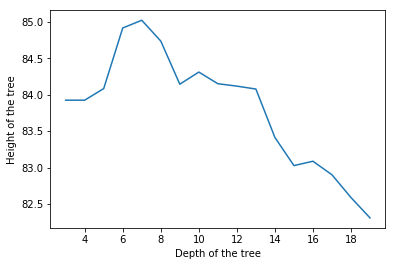

In [160]:
plt.plot(depth,accuracy)
plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.show()

From above graph the decision tree perform best when depth of the tree is 7

In [162]:
# training model and prediction
classifier= DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=40)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy.append(accuracy_score(y_test,y_pred)*100)

# calculating the accuarcy score and confusion matrix
acc= accuracy_score(y_test,y_pred)
conf_mat= confusion_matrix(y_test,y_pred)

print('Accuracy: ',acc*100,'%')
print('Confusion Matrix:\n ',conf_mat)

Accuracy:  85.0199203187251 %
Confusion Matrix:
  [[10845   515]
 [ 1741  1959]]


## 3. Model making and parameter tuning (Random forest classifier algorithm) 

In [169]:
# Using Random forest algorithms to find the factors importance
from sklearn.ensemble import RandomForestClassifier

depth=range(3,40,2)
accuracy=[]

# training model and prediction
for i in range(3,40,2):
    classifier =RandomForestClassifier(n_estimators=100,random_state=1, max_depth=i)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred)*100)


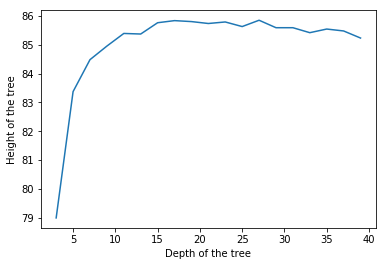

In [170]:
plt.plot(depth,accuracy)
plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.show()

In [175]:
n_estmtr=range(10,500,5)
accuracy=[]

# training model and prediction
for i in n_estmtr:
    classifier =RandomForestClassifier(n_estimators=i,random_state=1, max_depth=15)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred)*100)

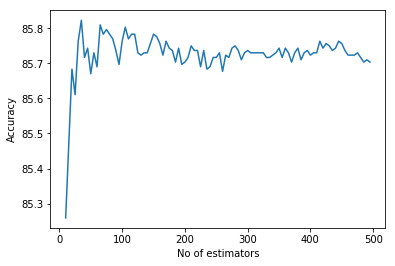

In [178]:
plt.plot(n_estmtr,accuracy)
plt.xlabel("No of estimators")
plt.ylabel("Accuracy")
plt.show()

model is best for no of estimators=35

In [179]:
# training model and prediction

classifier =RandomForestClassifier(n_estimators=35,random_state=1, max_depth=15)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

# calculating the accuarcy score and confusion matrix
acc= accuracy_score(y_test,y_pred)
conf_mat= confusion_matrix(y_test,y_pred)

print('Accuracy: ',acc*100,'%')
print('Confusion Matrix:\n ',conf_mat)

Accuracy:  85.82337317397078 %
Confusion Matrix:
  [[10825   535]
 [ 1600  2100]]


## Conclusion
### Xgboost algorithm is the best algorithm which gives the best prediction for the above data.
#### We have used the following algorithms for classifications and their accuracy are:-
 
#### 1. Logistic regression - 83.90438247011951 %
#### 2. Decision tree classifier - 85.0199203187251 %
#### 3. Random Forest classifier -  85.82337317397078 %
#### 4. Xgboost - 87.11819389110225 %